In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
# code adapted from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [3]:
df = pd.read_csv("Temp/df_proc_train_set.csv")
df['sol_category'] = pd.to_numeric(df['sol_category'], downcast='integer')
df

,Id,smiles,sol_category,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,...,rdkit_desc_fr_quatN,rdkit_desc_fr_sulfide,rdkit_desc_fr_sulfonamd,rdkit_desc_fr_sulfone,rdkit_desc_fr_term_acetylene,rdkit_desc_fr_tetrazole,rdkit_desc_fr_thiazole,rdkit_desc_fr_thiophene,rdkit_desc_fr_unbrch_alkane,rdkit_desc_fr_urea
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
#column.startswith('ecfp_') or 

In [5]:
list_x = [column for column in df.columns if column.startswith('ecfp_')]#(column.startswith('example_') or column.startswith('rdkit_desc_'))]
x = df[list_x]
x

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,ecfp_4086,ecfp_4087,ecfp_4088,ecfp_4089,ecfp_4090,ecfp_4091,ecfp_4092,ecfp_4093,ecfp_4094,ecfp_4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df.loc[:,['sol_category']].values
y

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]], dtype=int8)

In [7]:
x = StandardScaler().fit_transform(x)
x

array([[-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177],
       [-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177],
       [-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177],
       ...,
       [-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177],
       [-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177],
       [-0.03079639, -0.02606301, -0.18671033, ..., -0.04850884,
        -0.02318809, -0.09086177]])

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, df[['sol_category']]], axis = 1)

In [10]:
finalDf

,principal component 1,principal component 2,sol_category
0,-0.180597,-0.460022,0
1,4.927602,-0.730437,0
2,-1.670218,-2.870156,0
3,-0.117333,-3.251800,0
4,-3.749798,-3.280928,0
...,...,...,...
70706,-0.053503,0.528429,2
70707,-0.043844,7.706897,2
70708,-0.715385,3.667815,2
70709,0.969922,1.659220,2


In [11]:
from matplotlib import pyplot as plt

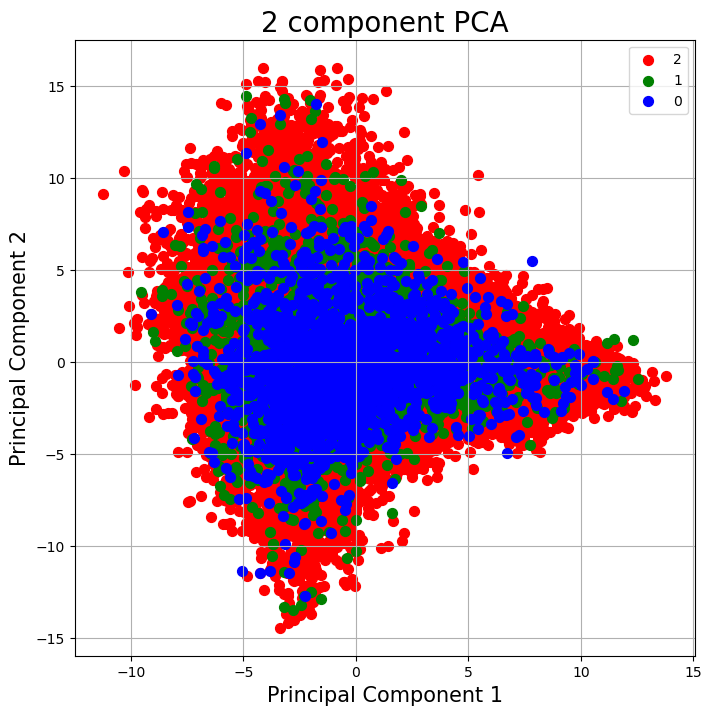

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2, 1, 0] #'low solubility', 'medium  solubility', 'high  solubility']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sol_category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()